<a href="https://colab.research.google.com/github/tskmr/MIP/blob/main/prog5(1009).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [8]:
###
### Exponential Distribution
###
lambdas = c(0.5, 1, 2)
x = seq(0, 3, len=100)
df = data.frame()
for(lambda in lambdas){ # 0.5, 1, 2
  cdf = 1-exp(-lambda*x)
  pdf = lambda * exp(-lambda * x)
  sf = 1-cdf
  hf = pdf/sf
  tmp= data.frame(lambda, x, cdf, pdf, hf)
  df = rbind(df, tmp)
}
head(df)

,lambda,x,cdf,pdf,hf
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.5,0.00000000,0.00000000,0.5000000,0.5
2,0.5,0.03030303,0.01503731,0.4924813,0.5
3,0.5,0.06060606,0.02984850,0.4850758,0.5
4,0.5,0.09090909,0.04443696,0.4777815,0.5
5,0.5,0.12121212,0.05880606,0.4705970,0.5
6,0.5,0.15151515,0.07295908,0.4635205,0.5


In [6]:
lambdas

[1] 0.5 1.0 2.0

In [7]:
x

[1] 0.00000000 0.03030303 0.06060606 0.09090909 0.12121212 0.15151515
  [7] 0.18181818 0.21212121 0.24242424 0.27272727 0.30303030 0.33333333
 [13] 0.36363636 0.39393939 0.42424242 0.45454545 0.48484848 0.51515152
 [19] 0.54545455 0.57575758 0.60606061 0.63636364 0.66666667 0.69696970
 [25] 0.72727273 0.75757576 0.78787879 0.81818182 0.84848485 0.87878788
 [31] 0.90909091 0.93939394 0.96969697 1.00000000 1.03030303 1.06060606
 [37] 1.09090909 1.12121212 1.15151515 1.18181818 1.21212121 1.24242424
 [43] 1.27272727 1.30303030 1.33333333 1.36363636 1.39393939 1.42424242
 [49] 1.45454545 1.48484848 1.51515152 1.54545455 1.57575758 1.60606061
 [55] 1.63636364 1.66666667 1.69696970 1.72727273 1.75757576 1.78787879
 [61] 1.81818182 1.84848485 1.87878788 1.90909091 1.93939394 1.96969697
 [67] 2.00000000 2.03030303 2.06060606 2.09090909 2.12121212 2.15151515
 [73] 2.18181818 2.21212121 2.24242424 2.27272727 2.30303030 2.33333333
 [79] 2.36363636 2.39393939 2.42424242 2.45454545 2.48484848 2.51515152
 [85] 2.54545455 2.57575758 2.60606061 2.63636364 2.66666667 2.69696970
 [91] 2.72727273 2.75757576 2.78787879 2.81818182 2.84848485 2.87878788
 [97] 2.90909091 2.93939394 2.96969697 3.00000000

In [ ]:
mdf = df %>% gather(k, v, -c(lambda, x)) %>%
  mutate(lambda = factor(lambda, labels=paste0("lambda=", unique(lambda)))) %>%
  mutate(k = factor(k,
                    levels=c("cdf", "pdf", "hf"),
                    labels = c("Cumulative Distribution Function",
                               "Probability Density Function",
                               "Hazard Function")))
mdf %>% head(101)


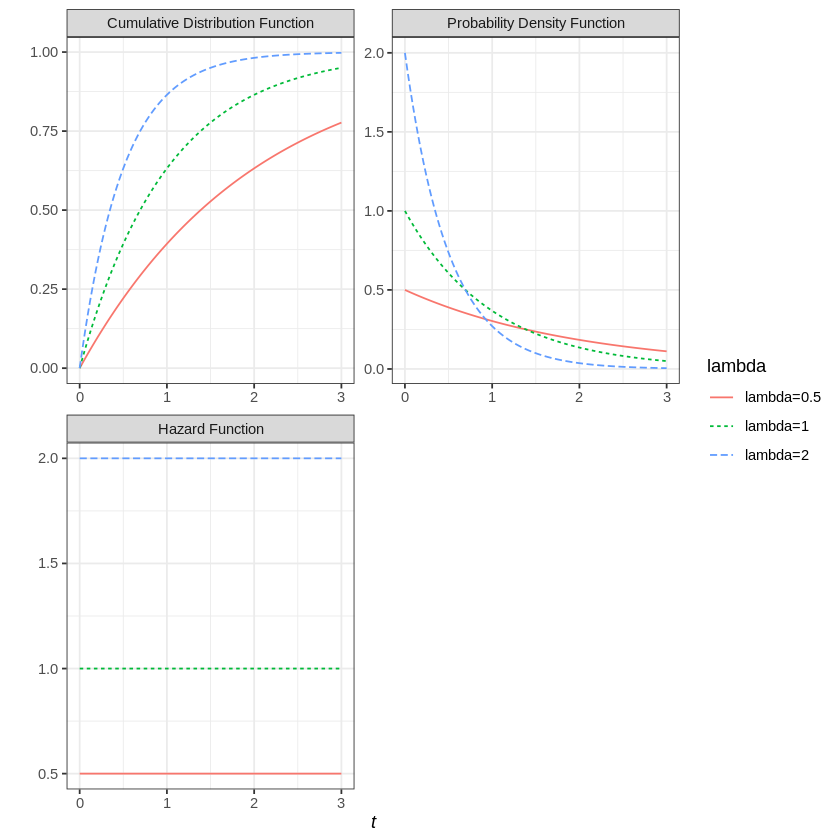

In [11]:
mdf %>%
  ggplot()+
  geom_line(aes(x, v, col=lambda, linetype=lambda))+
  facet_wrap(~k, scales="free", ncol=2)+
  xlab(bquote(italic(t)))+ylab("")+
  theme_bw()


In [ ]:
###
### Normal Distribution
###
phi_nor = function(z){ dnorm(z) }
Phi_nor = function(z){ pnorm(z) }
mu = 5
sigmas = c(0.3, 0.5, 0.8)
x = seq(3, 7, len=100)
df = data.frame()
for(sigma in sigmas){
  cdf = Phi_nor((x-mu)/sigma)
  pdf = phi_nor((x-mu)/sigma)/sigma
  sf = 1-cdf
  hf = pdf/sf
  tmp= data.frame(mu, sigma, x, cdf, pdf, hf)
  df = rbind(df, tmp)
}
mdf = df %>% gather(k, v, -c(mu, sigma, x)) %>%
  mutate(mu = factor(mu, labels=paste0("mu=", unique(mu)))) %>%
  mutate(sigma = factor(sigma, labels=paste0("sigma=", unique(sigma)))) %>%
  mutate(k = factor(k,
                    levels=c("cdf", "pdf", "hf"),
                    labels = c("Cumulative Distribution Function",
                               "Probability Density Function",
                               "Hazard Function")))
mdf %>%
  ggplot()+geom_line(aes(x, v, col=interaction(mu, sigma, sep=", "), linetype=interaction(mu, sigma, sep=", ")))+
  facet_wrap(~k, scales="free", ncol=2)+
  xlab(bquote(italic(t)))+ylab("")+
  theme_bw()
#ggsave("normal.pdf", width=gold.w*1, height=gold.h*1)


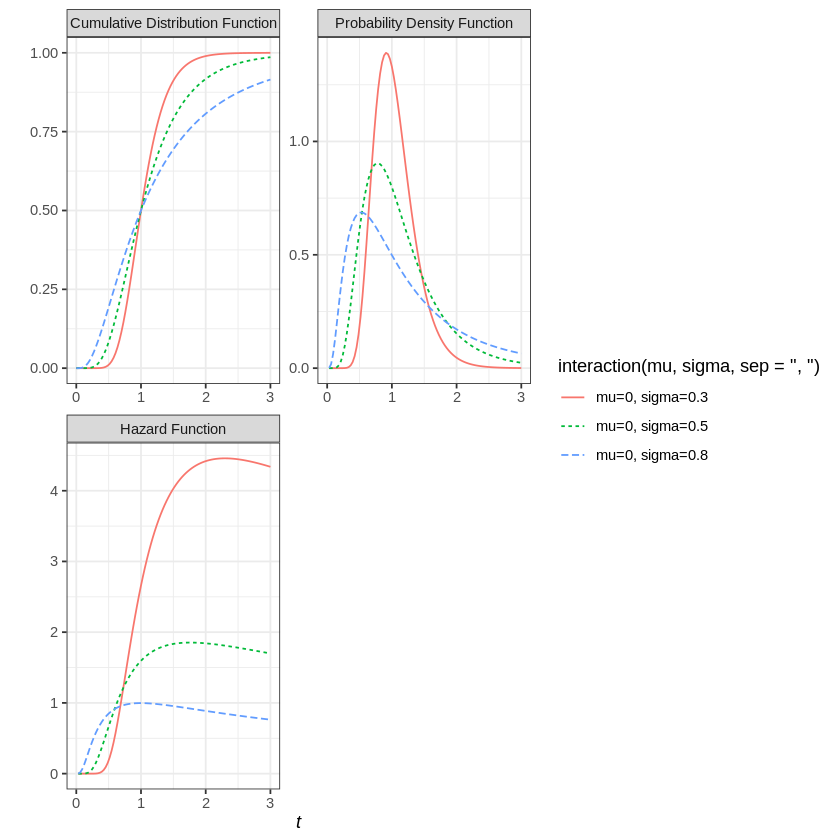

In [14]:
###
### Lognormal Distribution
###
mu = 0
sigmas = c(0.3, 0.5, 0.8)
x = seq(0, 3, len=100)
df = data.frame()
for(sigma in sigmas){
  cdf = # WRITE YOUR ANSWER #
    Phi_nor((log(x)-mu)/sigma)
  pdf = # WRITE YOUR ANSWER #
    phi_nor((log(x)-mu)/sigma)/(sigma*x)
  sf = # WRITE YOUR ANSWER #
    1-cdf
  hf = # WRITE YOUR ANSWER #
    pdf/sf
  tmp= data.frame(mu, sigma, x, cdf, pdf, hf)
  df = rbind(df, tmp)
}
mdf = df %>% gather(k, v, -c(mu, sigma, x)) %>%
  mutate(mu = factor(mu, labels=paste0("mu=", unique(mu)))) %>%
  mutate(sigma = factor(sigma, labels=paste0("sigma=", unique(sigma)))) %>%
  mutate(k = factor(k,
                    levels=c("cdf", "pdf", "hf"),
                    labels = c("Cumulative Distribution Function",
                               "Probability Density Function",
                               "Hazard Function")))
mdf %>%
  ggplot()+geom_line(aes(x, v, col=interaction(mu, sigma, sep=", "), linetype=interaction(mu, sigma, sep=", ")))+
  facet_wrap(~k, scales="free", ncol=2)+
  xlab(bquote(italic(t)))+ylab("")+
  theme_bw()
#ggsave("lognormal.pdf", width=gold.w*1, height=gold.h*1)


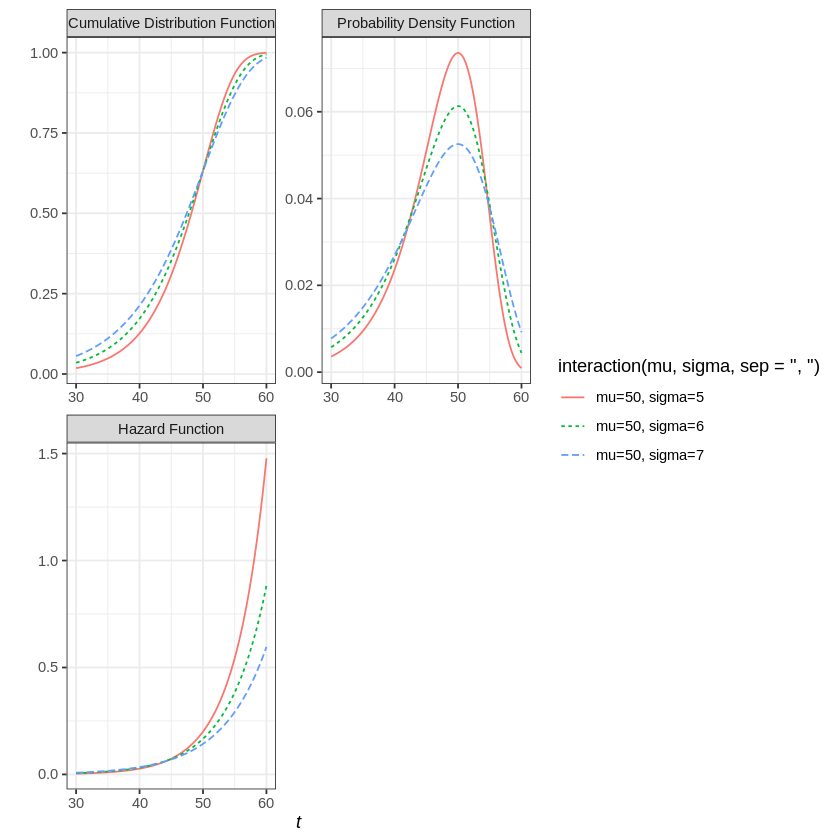

In [19]:
###
### Smallest Extreme Value Distribution
###

phi_sev = function(z){
  # WRITE YOUR ANSWER #
  exp(z - exp(z))
}
Phi_sev = function(z){
  # WRITE YOUR ANSWER #
  1 - exp( -exp(z) )
}
mu = 50
sigmas = c(5, 6, 7)
x = seq(30, 60, len=100)
df = data.frame()
for(sigma in sigmas){
  cdf = # WRITE YOUR ANSWER #
    Phi_sev((x-mu)/sigma)
  pdf = # WRITE YOUR ANSWER #
    phi_sev((x-mu)/sigma)/sigma
  sf = # WRITE YOUR ANSWER #
    1- cdf
  hf = # WRITE YOUR ANSWER #
    pdf/sf
  tmp= data.frame(mu, sigma, x, cdf, pdf, hf)
  df = rbind(df, tmp)
}
mdf = df %>% gather(k, v, -c(mu, sigma, x)) %>%
  mutate(mu = factor(mu, labels=paste0("mu=", unique(mu)))) %>%
  mutate(sigma = factor(sigma, labels=paste0("sigma=", unique(sigma)))) %>%
  mutate(k = factor(k,
                    levels=c("cdf", "pdf", "hf"),
                    labels = c("Cumulative Distribution Function",
                               "Probability Density Function",
                               "Hazard Function")))
mdf %>%
  ggplot()+geom_line(aes(x, v, col=interaction(mu, sigma, sep=", "), linetype=interaction(mu, sigma, sep=", ")))+
  facet_wrap(~k, scales="free", ncol=2)+
  xlab(bquote(italic(t)))+ylab("")+
  theme_bw()
# ggsave("sev.pdf", width=gold.w*1, height=gold.h*1)


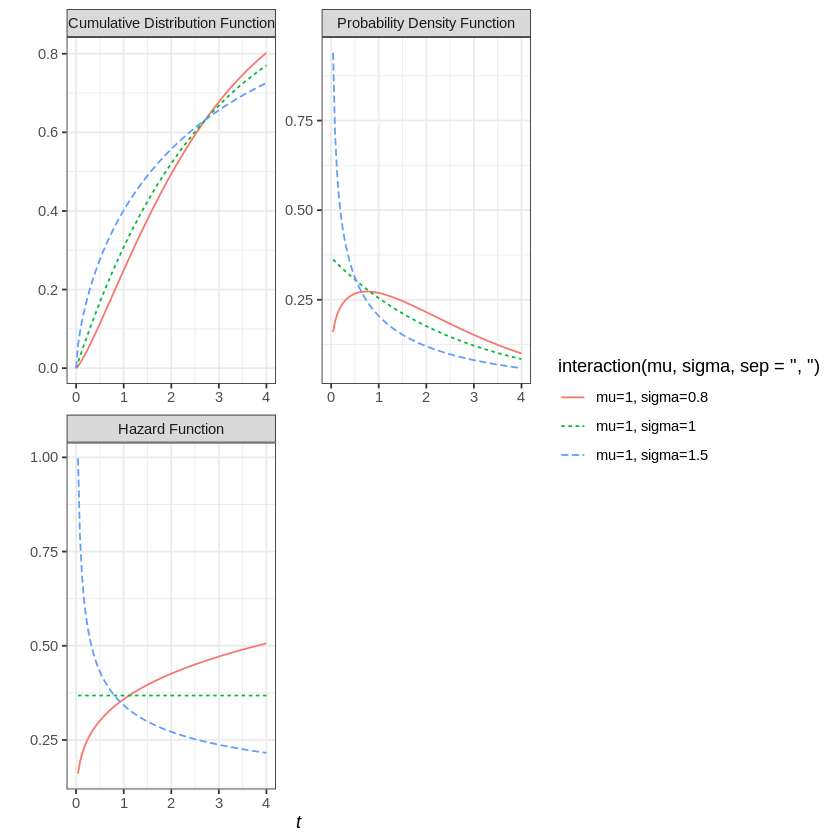

In [22]:
###
### Weibull Distribution
###

mu = 1
sigmas = c(0.8, 1, 1.5)
x = seq(0, 4, len=100)
df = data.frame()
for(sigma in sigmas){
  cdf = # WRITE YOUR ANSWER #
    Phi_sev((log(x)-mu)/sigma)
  pdf = # WRITE YOUR ANSWER #
    phi_sev((log(x)-mu)/sigma)/(sigma*x)
  sf = # WRITE YOUR ANSWER #
    1-cdf
  hf = # WRITE YOUR ANSWER #
    pdf/sf
  tmp= data.frame(mu, sigma, x, cdf, pdf, hf)
  df = rbind(df, tmp)
}
mdf = df %>% gather(k, v, -c(mu, sigma, x)) %>%
  mutate(mu = factor(mu, labels=paste0("mu=", unique(mu)))) %>%
  mutate(sigma = factor(sigma, labels=paste0("sigma=", unique(sigma)))) %>%
  mutate(k = factor(k,
                    levels=c("cdf", "pdf", "hf"),
                    labels = c("Cumulative Distribution Function",
                               "Probability Density Function",
                               "Hazard Function")))
mdf %>%
  ggplot()+geom_line(aes(x, v, col=interaction(mu, sigma, sep=", "), linetype=interaction(mu, sigma, sep=", ")))+
  facet_wrap(~k, scales="free", ncol=2)+
  xlab(bquote(italic(t)))+ylab("")+
  theme_bw()
# ggsave("weibull.pdf", width=gold.w*1, height=gold.h*1)


In [ ]:
###
### Largest Extreme Value Distribution
###


phi_lev = function(z){
  # WRITE YOUR ANSWER #
}
Phi_lev = function(z){
  # WRITE YOUR ANSWER #
}
mu = 10
sigmas = c(5, 6, 7)
x = seq(0, 40, len=100)
df = data.frame()
for(sigma in sigmas){
  cdf = # WRITE YOUR ANSWER #
  pdf = # WRITE YOUR ANSWER #
  sf = # WRITE YOUR ANSWER #
  hf = # WRITE YOUR ANSWER #
  tmp= data.frame(mu, sigma, x, cdf, pdf, hf)
  df = rbind(df, tmp)
}
mdf = df %>% gather(k, v, -c(mu, sigma, x)) %>%
  mutate(mu = factor(mu, labels=paste0("mu=", unique(mu)))) %>%
  mutate(sigma = factor(sigma, labels=paste0("sigma=", unique(sigma)))) %>%
  mutate(k = factor(k,
                    levels=c("cdf", "pdf", "hf"),
                    labels = c("Cumulative Distribution Function",
                               "Probability Density Function",
                               "Hazard Function")))
mdf %>%
  ggplot()+geom_line(aes(x, v, col=interaction(mu, sigma, sep=", "), linetype=interaction(mu, sigma, sep=", ")))+
  facet_wrap(~k, scales="free", ncol=2)+
  xlab(bquote(italic(t)))+ylab("")+
  mytheme_bw()
ggsave("lev.pdf", width=gold.w*1, height=gold.h*1)



###
### Logistic Distribution
###

phi_logis = function(z){
  # WRITE YOUR ANSWER #
}
Phi_logis = function(z){
  # WRITE YOUR ANSWER #
}
mu = 15
sigmas = c(1, 2, 3)
x = seq(5, 25, len=100)
df = data.frame()
for(sigma in sigmas){
  cdf = Phi_logis((x-mu)/sigma)
  pdf = 1/sigma * phi_logis((x-mu)/sigma)
  sf = 1-cdf
  hf = pdf/sf
  tmp= data.frame(mu, sigma, x, cdf, pdf, hf)
  df = rbind(df, tmp)
}
mdf = df %>% gather(k, v, -c(mu, sigma, x)) %>%
  mutate(mu = factor(mu, labels=paste0("mu=", unique(mu)))) %>%
  mutate(sigma = factor(sigma, labels=paste0("sigma=", unique(sigma)))) %>%
  mutate(k = factor(k,
                    levels=c("cdf", "pdf", "hf"),
                    labels = c("Cumulative Distribution Function",
                               "Probability Density Function",
                               "Hazard Function")))
mdf %>%
  ggplot()+geom_line(aes(x, v, col=interaction(mu, sigma, sep=", "), linetype=interaction(mu, sigma, sep=", ")))+
  facet_wrap(~k, scales="free", ncol=2)+
  xlab(bquote(italic(t)))+ylab("")+
  mytheme_bw()
ggsave("logistic.pdf", width=gold.w*1, height=gold.h*1)




###
### Loglogistic Distribution
###

mu = 0
sigmas = c(0.2, 0.4, 0.6)
x = seq(0, 4, len=100)
df = data.frame()
for(sigma in sigmas){
  cdf = # WRITE YOUR ANSWER #
  pdf = # WRITE YOUR ANSWER #
  sf = # WRITE YOUR ANSWER #
  hf = # WRITE YOUR ANSWER #
  tmp= data.frame(mu, sigma, x, cdf, pdf, hf)
  df = rbind(df, tmp)
}
mdf = df %>% gather(k, v, -c(mu, sigma, x)) %>%
  mutate(mu = factor(mu, labels=paste0("mu=", unique(mu)))) %>%
  mutate(sigma = factor(sigma, labels=paste0("sigma=", unique(sigma)))) %>%
  mutate(k = factor(k,
                    levels=c("cdf", "pdf", "hf"),
                    labels = c("Cumulative Distribution Function",
                               "Probability Density Function",
                               "Hazard Function")))
mdf %>%
  ggplot()+geom_line(aes(x, v, col=interaction(mu, sigma, sep=", "), linetype=interaction(mu, sigma, sep=", ")))+
  facet_wrap(~k, scales="free", ncol=2)+
  xlab(bquote(italic(t)))+ylab("")+
  mytheme_bw()
ggsave("loglogistic.pdf", width=gold.w*1, height=gold.h*1)


